<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [149]:
data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

In [9]:
# DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [10]:
# data = pd.read_csv(DATA_URL + "adult.data.csv")
# data.head()

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [12]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [14]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [15]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [16]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [17]:
age_categories = [age_category(age) for age in data.Age]

In [18]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [19]:
data["Age_category"] = data["Age"].apply(age_category)

In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [23]:
# Ваш код здесь
print('male', len(data[data["Sex"] == "male"]))
print('female', len(data[data["Sex"] == "female"]))

male 577
female 314


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [31]:
data[data["Sex"] == "male"]['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [25]:
# Ваш код здесь
len(data[(data["Sex"] == "male") & (data["Pclass"] == 2)])

108

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [33]:
# Ваш код здесь
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_category
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.814815
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.801995
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [37]:
round(data['Fare'].mean(), 2)

32.2

In [38]:
round(data['Fare'].std(), 2)

49.69

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [150]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <=60 -> 2
    > 60 -> 3
    """
    if age < 30:
        return 1
    elif age <= 60:
        return 2
    else:
        return 3

In [151]:
data["Age_category"] = data["Age"].apply(age_category)

In [152]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


In [49]:
# Ваш код здесь
# доля выживших до 30 лет
len(data[(data["Age_category"] == 1) & (data["Survived"] == 1)])/len(data[data["Age_category"] == 1])

0.40625

In [50]:
# доля выживших после 60 лет
len(data[(data["Age_category"] == 3) & (data["Survived"] == 1)])/len(data[data["Age_category"] == 1])

0.1484375

In [52]:
# доля выживших после 55 лет
len(data[(data["Age"] >= 55) & (data["Survived"] == 1)])/len(data[data["Age"] >= 55])

0.30952380952380953

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [53]:
# Ваш код здесь
# доля выживших мужчин
len(data[(data["Sex"] == 'male') & (data["Survived"] == 1)])/len(data[data["Sex"] == 'male'])

0.18890814558058924

In [54]:
# доля выживших мужчин
len(data[(data["Sex"] == 'female') & (data["Survived"] == 1)])/len(data[data["Sex"] == 'female'])

0.7420382165605095

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [67]:
# Ваш код здесь
data[data["Sex"] == 'male']['Name'].nunique()

577

In [68]:
data[data["Sex"] == 'male']['Name']

PassengerId
1             Braund, Mr. Owen Harris
5            Allen, Mr. William Henry
6                    Moran, Mr. James
7             McCarthy, Mr. Timothy J
8      Palsson, Master. Gosta Leonard
                    ...              
884     Banfield, Mr. Frederick James
885            Sutehall, Mr. Henry Jr
887             Montvila, Rev. Juozas
890             Behr, Mr. Karl Howell
891               Dooley, Mr. Patrick
Name: Name, Length: 577, dtype: object

Из за того, что в признак имя внесено не только имя, но еще и фамилия, необходимо создать новый признак, выделяющий имя в отдельный столбец

In [61]:
def age_category(name):
    """
    separates the name
    """
    new_name = name.split(',')
    return new_name[0]

In [62]:
data["Sep_name"] = data["Name"].apply(age_category)

In [148]:
data

[15, 25, 25, 30, 5]

In [69]:
data[data["Sex"] == 'male']['Sep_name'].nunique()

497

In [71]:
data[data["Sex"] == 'male']['Sep_name'].count()

577

In [72]:
data['Sep_name'].mode()

0    Andersson
Name: Sep_name, dtype: object

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [ ]:
# Ваш код здесь

In [78]:
from matplotlib import pyplot as plt

In [94]:
data[data['Survived'] == 1]['Age_category']

PassengerId
2      2
3      1
4      2
9      1
10     1
      ..
876    1
880    2
881    1
888    1
890    1
Name: Age_category, Length: 342, dtype: int64

In [153]:
vals = data[data['Survived'] == 1]['Age_category'].value_counts()
vals

1    156
2    129
3     57
Name: Age_category, dtype: int64

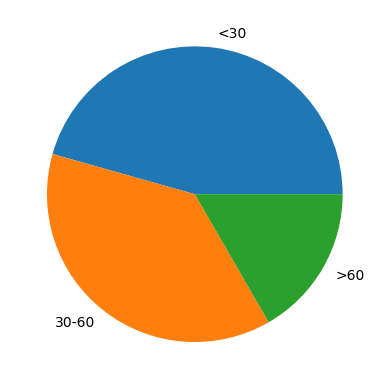

In [154]:
vals = list(data[data['Survived'] == 1]['Age_category'].value_counts())
labels = ['<30', '30-60', '>60']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels);

In [155]:
ax.hist(data[data['Survived'] == 1]['Age_category'])
ax.set_ylabel('cm')
ax.legend()

Text(0.5, 1.0, 'возрастные категории выживших')

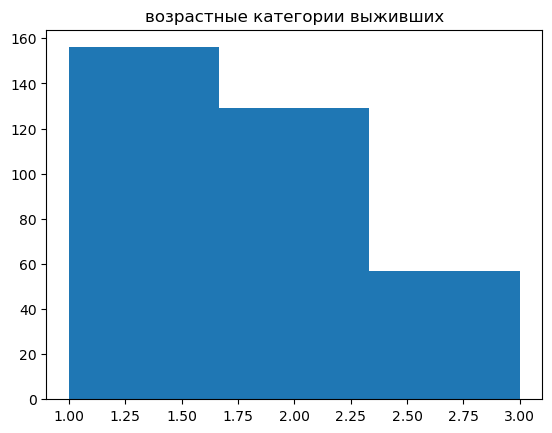

In [165]:
fig, axs = plt.subplots()
n_bins = len(data[data['Survived'] == 1]['Age_category'].unique())
axs.hist(data[data['Survived'] == 1]['Age_category'], bins=n_bins)
axs.set_title('возрастные категории выживших')

то же самое в seaborn

In [133]:
import seaborn as sns

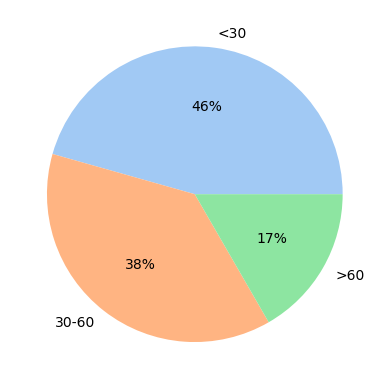

In [159]:
plt.pie(x=vals, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

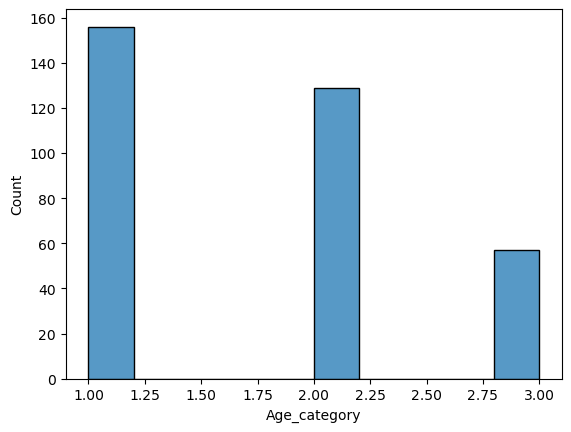

In [161]:
sns_plot = sns.histplot(data[data['Survived'] == 1]['Age_category'], kde=False)
fig = sns_plot.get_figure()

то же самое в pandas

<AxesSubplot:>

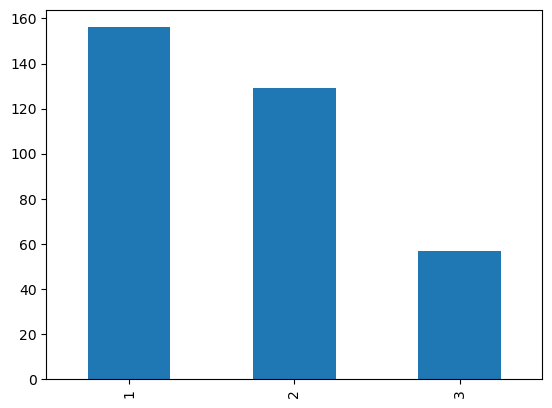

In [169]:
data[data['Survived'] == 1]['Age_category'].value_counts().plot(kind='bar')

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [ ]:
# Ваш код здесь

In [103]:
# В среднем мужчины 1-го класса старше 40 лет
data[(data["Sex"] == 'male') & (data["Pclass"] == 1)]['Age'].mean()

41.28138613861386

In [104]:
# В среднем женщины 1-го класса старше 40 лет
data[(data["Sex"] == 'female') & (data["Pclass"] == 1)]['Age'].mean()

34.61176470588235

In [ ]:
# Мужчины всех классов в среднем старше женщин того же класса

In [105]:
# 1
data[(data["Sex"] == 'male') & (data["Pclass"] == 1)]['Age'].mean() > \
    data[(data["Sex"] == 'female') & (data["Pclass"] == 1)]['Age'].mean()

True

In [106]:
# 2
data[(data["Sex"] == 'male') & (data["Pclass"] == 2)]['Age'].mean() > \
    data[(data["Sex"] == 'female') & (data["Pclass"] == 2)]['Age'].mean()

True

In [107]:
# 3
data[(data["Sex"] == 'male') & (data["Pclass"] == 3)]['Age'].mean() > \
    data[(data["Sex"] == 'female') & (data["Pclass"] == 3)]['Age'].mean()

True

In [ ]:
# В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [108]:
# 1>2
data[data["Pclass"] == 1]['Age'].mean() > \
    data[data["Pclass"] == 2]['Age'].mean()

True

In [109]:
# 2>3
data[data["Pclass"] == 2]['Age'].mean() > \
    data[data["Pclass"] == 3]['Age'].mean()

True